# INFO 2950 Fall 2024 Homework 6

For each answer code cell, **do not** erase the line stating `#A1: your code here`; instead, write your answer code directly below the line.

When you turn in this homework, all cells must be executed and the notebook saved with output included. You must also save your **fully executed notebook** as a pdf following the instructions in the Student Handbook posted on Canvas > Modules > Course Policies. You will turn in this notebook without any of the data files.

A **fully executed notebook** means that you should be seeing the expected output printed below the cell after you click "Restart Kernel and Run All Cells." *If any cell in the PDF of your notebook does not have the expected output printed below it, it will not be considered fully executed and you will not receive points for the questions in that cell.*

**If you use any sources aside from the standard documentation of Python libraries, you must cite the sources (e.g., StackOverflow links) used to answer the below questions. If you use ChatGPT, you must include proof of the prompt you used, as well as an explanation of why the resulting code is correct.**

In this homework, you will practice more with probability and machine learning methods. You will implement methods like sentiment analysis, Singular Value Decomposition, K-means clustering, and Naïve Bayes.

Part of this homework will involve practicing how to use online resources. *Nobody* remembers everything. There is no level of experience that will allow you to never use documentation and question-answer forums. The key is to use these in ways that help you grow your skills, not in ways that prevent you from growing. They also provide an opportunity to express gratitude for people who helped you.

**NetID:** kl739

---

## Problem 0
Do not move or modify this cell, we use it for automated homework analysis.

**This problem is for you to use to cite your sources.**

You will update this problem over the course of the homework. Describe problems, error messages, and bugs you encountered, and how you fixed or addressed them. List URLs for any online resources (like Stack Overflow) you found useful and mention fellow students, TAs, or other people who helped you. If you use ChatGPT, you must include proof of the prompt you used, as well as an explanation of why the resulting code is correct. If you do not appropriately fill out Problem 0, you will receive 0 points on the entire homework assignment.



**ADD YOUR SOURCES HERE**
* **Chatgpt prompt: "How do you multiply the dimensions of a CountVectorizer() matrix by 8?"** -> This prompt gave me the answer that I had to get the dimensions of word_counts using .shape, which was my first thought as well. I originally wasn't sure how to multiply the dimensions by 8. I didn't know if I needed to multiply rows by 8 and add that to columns multiplied 8. But Chatgpt said that I simply needed to multiply rows by columns by 8. After following this steps, my code output matched the expected output.
* **Chatgpt prompt: "How do you used the sorted function to sort tuples?"** -> I asked Chatgpt this prompt because my code for C9 was not matching the expected output. My original tuple had the first element as tfidf_vocabulary and the second element as diff. However, sorting the tuples by diff (the second element) was rather complex. So as a solution, I switched the elements of the tuple so that the first element was now diff and the second element was tfidf_vocabulary.
* **Chatgpt prompt: "How do i round in python so that it prints 1.30 and not 1.3?"** -> My code was outputting rounded values like 1.3 instead of the expected output of 1.30, so I asked Chatgpt how to fix this issue. Chatgpt gave me the solution of f-strings with precision specifier. By using a specifier like `:.2f`, this ensures that my output is rounded to 2 decimal places, even if the last decimal place is a 0.
* **Error message = "TypeError: 'KMeans' object is not subscriptable"** -> I Googled this error, but I didn't find anything helpful. I used trial and error to get the expected output for D2, but I wasn't sure if I was allowed to index the labels. I used Chatgpt to check my answer, and this was my Chatgpt prompt: **how do i use .labels_ to find the cluster associated with the review at a certain index?** It confirmed my trial-and-error process, so my final code is `target_cluster = clustering.labels_[39]`.
* I didn't know how to calculate an un-normalized probability for Bayes. I used StackExchange and ChatGPT to help me. **StackExchange** (https://stats.stackexchange.com/questions/12112/normalizing-constant-in-bayes-theorem) helped me learn that "Pr(data) [the denominator of the Bayes Rule] is nothing but a "normalising constant." **My ChatGPT prompt was this: "How to you unnormalize a bayes rule probability?"** Chatgpt explained that I just needed to ignore the denominator of the Bayes Rule.


---

In [1]:
import numpy as np
import pandas as pd

import seaborn
from matplotlib import pyplot

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize

from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS
import string
from matplotlib import pyplot as plt

**Note:** If you receive a `ModuleNotFoundError: No module named 'wordcloud'` when you run the import statements above, you should:
1. Uncomment and run the below cell: `%pip install wordcloud`
2. Click 'Kernel > Restart Kernel and Clear Outputs of All Cells...'
4. Rerun the import statements

In [2]:
#%pip install wordcloud

# Part A: Letter Probabilities and Language Detection

In class, we calculated the probability of ghost or pumpkin from two "urns", and used those numbers to guess which urn was more likely to have produced that sequence of emoji.
In this problem you will do the same thing but with a sequence of letters. Instead of urns, you will compare the probability of each sequence of letters to the probability of each letter for several European languages.




## Problem A1 (2 points)


Start by loading letter frequency data from the file `letter_frequency.csv`, using `pd.read_csv`. This data is from [Wikipedia](https://en.wikipedia.org/wiki/Letter_frequency#Relative_frequencies_of_letters_in_other_languages), collected by Adrianus Kleemans in a data file at [this Github repo](https://github.com/akleemans/letter-frequency). You will need to specify the correct delimiter (it might help to open the contents of the csv in a text editor, or through Jupyter) using the `delimiter` parameter. You should also set the index column (`index_col`) parameter to be the  `Letter` column.

The numeric values in the file are percentages, but we want probabilities. Multiply the dataset by `0.01` and save the output dataframe in a variable `letter_data`. Print the first five rows of the dataframe using a combination of `print` and `head`.


*Hint*: if your output doesn’t look exactly like ours, it might be because you’re only displaying and not printing the head of the dataframe.

In [3]:
# A1: your code here
letter_frequency = pd.read_csv('letter_frequency.csv', delimiter = ';', \
                               index_col = 'Letter')
letter_data = 0.01 * letter_frequency
print(letter_data.head())

         French   German  Spanish  Portuguese  Esperanto  Italian  Turkish  \
Letter                                                                       
a       0.07636  0.06516  0.11525     0.14634    0.12117  0.11745  0.12920   
b       0.00901  0.01886  0.02215     0.01043    0.00980  0.00927  0.02844   
c       0.03260  0.02732  0.04019     0.03882    0.00776  0.04501  0.01463   
d       0.03669  0.05076  0.05010     0.04992    0.03044  0.03736  0.05206   
e       0.14715  0.16396  0.12181     0.12570    0.08995  0.11792  0.09912   

        Swedish   Polish    Dutch   Danish  Icelandic  Finnish    Czech  
Letter                                                                   
a       0.09383  0.10503  0.07486  0.06025    0.10110  0.12217  0.08421  
b       0.01535  0.01740  0.01584  0.02000    0.01043  0.00281  0.00822  
c       0.01486  0.03895  0.01242  0.00565    0.00000  0.00281  0.00740  
d       0.04702  0.03725  0.05933  0.05858    0.01575  0.01043  0.03475  
e       0


**A1 Expected Output**
```
         French   German  Spanish  Portuguese  Esperanto  Italian  Turkish  \
Letter                                                                       
a       0.07636  0.06516  0.11525     0.14634    0.12117  0.11745  0.12920   
b       0.00901  0.01886  0.02215     0.01043    0.00980  0.00927  0.02844   
c       0.03260  0.02732  0.04019     0.03882    0.00776  0.04501  0.01463   
d       0.03669  0.05076  0.05010     0.04992    0.03044  0.03736  0.05206   
e       0.14715  0.16396  0.12181     0.12570    0.08995  0.11792  0.09912   

        Swedish   Polish    Dutch   Danish  Icelandic  Finnish    Czech  
Letter                                                                   
a       0.09383  0.10503  0.07486  0.06025    0.10110  0.12217  0.08421  
b       0.01535  0.01740  0.01584  0.02000    0.01043  0.00281  0.00822  
c       0.01486  0.03895  0.01242  0.00565    0.00000  0.00281  0.00740  
d       0.04702  0.03725  0.05933  0.05858    0.01575  0.01043  0.03475  
e       0.10149  0.07352  0.17324  0.15453    0.06418  0.07968  0.07562  
```

## Problem A2 (3 Points)

a) Create a variable `polish` and set it equal to the column for `"Polish"` from the data frame. Print the first 26 values of this series.

b) Use the `.loc` accessor on the `letter_data` df to get the row in the original data set for `"c"`. Print this row (not specific to Polish); it will be displayed vertically.

c) Finally, take the natural logarithm of that row for the letter `"c"` (use `np.log()` on your answer from part b). Print the result.

*Note:* In part (c), you may get a warning ` RuntimeWarning: divide by zero encountered in log`! This is expected behavior as `log(0)` is undefined. In such cases, the probability returned will be undefined.

In [4]:
# A2(a): your code here
polish = letter_data.iloc[:, 8]
print(polish[:26])

Letter
a    0.10503
b    0.01740
c    0.03895
d    0.03725
e    0.07352
f    0.00143
g    0.01731
h    0.01015
i    0.08328
j    0.01836
k    0.02753
l    0.02564
m    0.02515
n    0.06237
o    0.06667
p    0.02445
q    0.00000
r    0.05243
s    0.05224
t    0.02475
u    0.02062
v    0.00012
w    0.05813
x    0.00004
y    0.03206
z    0.04852
Name: Polish, dtype: float64



**A2(a) Expected Output**
```
Letter
a    0.10503
b    0.01740
c    0.03895
d    0.03725
e    0.07352
f    0.00143
g    0.01731
h    0.01015
i    0.08328
j    0.01836
k    0.02753
l    0.02564
m    0.02515
n    0.06237
o    0.06667
p    0.02445
q    0.00000
r    0.05243
s    0.05224
t    0.02475
u    0.02062
v    0.00012
w    0.05813
x    0.00004
y    0.03206
z    0.04852
Name: Polish, dtype: float64
```

In [5]:
# A2(b): your code here
row_c = letter_data.loc['c']
print(row_c)

French        0.03260
German        0.02732
Spanish       0.04019
Portuguese    0.03882
Esperanto     0.00776
Italian       0.04501
Turkish       0.01463
Swedish       0.01486
Polish        0.03895
Dutch         0.01242
Danish        0.00565
Icelandic     0.00000
Finnish       0.00281
Czech         0.00740
Name: c, dtype: float64


**A2(b) Expected Output**

```
French        0.03260
German        0.02732
Spanish       0.04019
Portuguese    0.03882
Esperanto     0.00776
Italian       0.04501
Turkish       0.01463
Swedish       0.01486
Polish        0.03895
Dutch         0.01242
Danish        0.00565
Icelandic     0.00000
Finnish       0.00281
Czech         0.00740
Name: c, dtype: float64
```

In [67]:
# A2(c): your code here
print(np.log(row_c))

French       -3.423443
German       -3.600136
Spanish      -3.214137
Portuguese   -3.248820
Esperanto    -4.858773
Italian      -3.100871
Turkish      -4.224681
Swedish      -4.209082
Polish       -3.245477
Dutch        -4.388447
Danish       -5.176100
Icelandic         -inf
Finnish      -5.874571
Czech        -4.906275
Name: c, dtype: float64


**A2(c) Expected Output**
```
French       -3.423443
German       -3.600136
Spanish      -3.214137
Portuguese   -3.248820
Esperanto    -4.858773
Italian      -3.100871
Turkish      -4.224681
Swedish      -4.209082
Polish       -3.245477
Dutch        -4.388447
Danish       -5.176100
Icelandic         -inf
Finnish      -5.874571
Czech        -4.906275
Name: c, dtype: float64
```

## Problem A3 (4 points)
Consider the results from problem A2 and answer the following questions:

a) Are any English letters not present in the Polish text? Which one(s)?

b) Which language has the highest probability of "*c*"?

c) How can you tell from the log probabilities which language has the highest probability?

d) Which language does not use the letter "*c*"? What happens to the log probability for that language?

**A3: your answer here**

a) The letter "q" is not present in the Polish text; the probability that the letter "q" is in the Polish alphabet is 0.0.

b) Italian has the highest probability of "c" with a probability of 0.045.

c) Using the log probabilities, the language that has the highest probability of "c" is the least negative. In other words, the language with the largest log probability is the language that has the highest probability.

d) Icelandic does not use the letter "c" since its probability is listed as 0.0. The log probability for Icelandic for the letter "c" is an infinite value (infinity). 

## Problem A4 (5 Points)

a) Create a function `get_scores` that takes one argument, a string `s`. The function will return the sum of the log-probabilities of every character in the string `s` being present in each of the 14 languages in `letter_data`.

In this function:

1. Convert the input string `s` to lowercase.
2. Use the function `np.zeros` to create a variable `language_scores` that is an array of 14 zeros (one for each language).
3. Write a `for` loop that iterates over each letter `c` in `s`. (Remember that a Python string is an array of letters!) Within the `for` loop:
    * First, check to see if letter `c` is in the `index` of `letter_data`.
    * Then, if it is, calculate the log-probabilities of letter `c` occurring in each language (i.e. the same calculation as in problem A2c)
    * Finally, add the log-probabilities of letter `c` occurring in each language to the array `language_scores`. (Remember, in `numpy` you can add the entire array with one operation!)
4. Return `language_scores`.

b) Use the `get_scores` function to evaluate the log probabilities of the string `"abc"` occurring in each of the 14 languages. Print this result.

c) Which language is most likely to have produced this string?

d) Why is Icelandic negative infinity?

In [7]:
# A4(a): your code here
def get_scores(s):
    s = s.lower()
    language_scores = np.zeros(14)
    for c in s:
        if letter_data.index.isin([c]).any():
            log_prob_c = np.log(letter_data.loc[c])
            language_scores = language_scores + log_prob_c
    return language_scores

In [8]:
# A4(b): your code here
print(get_scores('abc'))

French       -10.705159
German       -10.301758
Spanish       -9.184706
Portuguese    -9.733711
Esperanto    -11.594707
Italian       -9.923585
Turkish       -9.831033
Swedish      -10.751993
Polish        -9.550271
Dutch        -11.125800
Danish       -11.897375
Icelandic          -inf
Finnish      -13.851483
Czech        -12.181902
dtype: float64


**A4(b) Expected Output**

```
French       -10.705159
German       -10.301758
Spanish       -9.184706
Portuguese    -9.733711
Esperanto    -11.594707
Italian       -9.923585
Turkish       -9.831033
Swedish      -10.751993
Polish        -9.550271
Dutch        -11.125800
Danish       -11.897375
Icelandic          -inf
Finnish      -13.851483
Czech        -12.181902
Name: a, dtype: float64
```

**A4(c): your answer here** Spanish is most likely to have produced this string "abc". 

**A4(d): your answer here** Icelandic is negative infinity because the model believes it is impossible for Icelandic to have produced the string "abc".

## Problem A5 (6 Points)

We have selected several short passages from Wikipedias in different languages. These languages include Dutch, Finnish, German, Icelandic, Italian, Polish, and Portuguese.

(i) For each passage below, use your `get_scores` function to calculate and print the likelihood scores for each language.

(ii) Then guess what language this text is (either using your own knowledge or using Google Translate). In one sentence, comment on whether your guess agrees with your code output’s highest likelihood language. If your guess doesn’t agree with the auto-detected language, explain why that might be (for example, by specifying any letters or phrases that might be particularly identifying of a language).

In [9]:
# A5(a): given code
text_a5a = "Het Rijksmuseum in Amsterdam bevat een uitgebreide collectie van kunstwerken uit de Nederlandse Gouden Eeuw, waaronder schilderijen van Rembrandt en Vermeer."

In [10]:
# A5(a)i: your code here to get scores for text sample text_a5a
print(get_scores(text_a5a))

French       -405.287554
German       -384.190684
Spanish      -420.285253
Portuguese   -421.466444
Esperanto           -inf
Italian      -427.758675
Turkish             -inf
Swedish      -398.180763
Polish       -436.265275
Dutch        -380.072679
Danish       -395.037240
Icelandic           -inf
Finnish      -426.365139
Czech        -438.919652
dtype: float64


**A5(a)ii: your answer here**

* I'm guessing that this text is Dutch. 
* This guess agrees with my code's outputted highest likelihood language. The language scores show that Dutch has the highest likelihood probability. 

In [11]:
# A5(b): given code
text_a5b = "La Torre di Pisa è famosa per la sua inclinazione, che è stata causata da un cedimento del terreno durante la costruzione."

In [12]:
# A5(b)i: your code here to get scores for text sample text_a5b
print(get_scores(text_a5b))

French       -283.114091
German              -inf
Spanish             -inf
Portuguese          -inf
Esperanto           -inf
Italian      -277.345436
Turkish             -inf
Swedish             -inf
Polish              -inf
Dutch               -inf
Danish              -inf
Icelandic           -inf
Finnish             -inf
Czech               -inf
dtype: float64


**A5(b)ii: your answer here**

* My guess is that this text is Italian. 
* My ugess agrees with my code's outputted highest likelihood language because Italian has the highiest likelihood probability. 

In [13]:
# A5(c): given code
text_a5c = "Lähtökohdat ja päämäärät vaihtelevat suuresti eri kulttuureissa, mutta filosofian peruskysymykset pysyvät samoina."

In [14]:
# A5(c)i: your code here to get scores for text sample text_a5c
print(get_scores(text_a5c))

French              -inf
German       -352.426590
Spanish             -inf
Portuguese          -inf
Esperanto           -inf
Italian             -inf
Turkish             -inf
Swedish      -319.569705
Polish              -inf
Dutch               -inf
Danish              -inf
Icelandic           -inf
Finnish      -304.385139
Czech               -inf
dtype: float64


**A5(c)ii: your answer here**

* My guess is that this text is Swedish.
* My guess did not agree with my code's outputted highest likelihood language which shows that the text is Finnish.

In [15]:
# A5(d): given code
text_a5d = "Útganga landa úr Evrópusambandinu er stundum umdeild, þar sem margar þjóðir hafa ólíkar skoðanir á framtíðinni innan sambandsins."

In [16]:
# A5(d)i: your code here to get scores for text sample text_a5d
print(get_scores(text_a5d))

French              -inf
German              -inf
Spanish             -inf
Portuguese          -inf
Esperanto           -inf
Italian             -inf
Turkish             -inf
Swedish             -inf
Polish              -inf
Dutch               -inf
Danish              -inf
Icelandic    -337.139383
Finnish             -inf
Czech               -inf
dtype: float64


**A5(d)ii: your answer here**

* I guessed that this text was Icelandic.
* This guess agrees with my code's outputted highest likelihood language. Icelandic was the only language that my code outputted as a possible language. 

In [17]:
# A5(e): given code
text_a5e = "Der menschliche Körper besteht aus etwa 37 Billionen Zellen, die durch verschiedene biologische Prozesse miteinander verbunden sind."

In [18]:
# A5(e)i: your code here to get scores for text sample text_a5e
print(get_scores(text_a5e))

French              -inf
German       -322.491652
Spanish             -inf
Portuguese          -inf
Esperanto           -inf
Italian             -inf
Turkish             -inf
Swedish      -341.173107
Polish              -inf
Dutch               -inf
Danish              -inf
Icelandic           -inf
Finnish      -371.894533
Czech               -inf
dtype: float64


**A5(e)ii: your answer here**

* My guess is that this text is German.
* My guess agrees with my code's outputted highest likelihood language which displays German with the highest likelihood probability. 

In [19]:
# A5(f): given code
text_a5f = "A arquitetura moderna no Brasil foi amplamente influenciada por nomes como Oscar Niemeyer e Lúcio Costa, que projetaram edifícios icônicos em Brasília."

In [20]:
# A5(f)i: your code here to get scores for text sample text_a5f
print(get_scores(text_a5f))

French              -inf
German              -inf
Spanish             -inf
Portuguese   -381.285088
Esperanto           -inf
Italian             -inf
Turkish             -inf
Swedish             -inf
Polish              -inf
Dutch               -inf
Danish              -inf
Icelandic           -inf
Finnish             -inf
Czech               -inf
dtype: float64


**A5(f)ii: your answer here**

* My guess is that this text is Spanish.  
* My guess did not agree with my code's outputted highest likelihood language which displayed Spanish with a negative infinity likelihood probability. My code showed that this text is actually Portuguese.

In [21]:
# A5(g): given code
text_a5g = "Na początku swojej kariery sportowej, koszykarz zyskał sławę w USA, ale jego nazwisko, Qiang, jest niełatwe do wymówienia dla Polaków."

In [22]:
# A5(g)i: your code here to get scores for text sample text_a5g
print(get_scores(text_a5g))

French       -inf
German       -inf
Spanish      -inf
Portuguese   -inf
Esperanto    -inf
Italian      -inf
Turkish      -inf
Swedish      -inf
Polish       -inf
Dutch        -inf
Danish       -inf
Icelandic    -inf
Finnish      -inf
Czech        -inf
dtype: float64


**A5(g)ii: your answer here**

* My guess is that this text is Polish. 
* My guess does not agree with my code, which shows that this text is not any of the displayed languages. This may be because of the name "Qiang", which may make it hard for my code to detect the correct language.

# Part B: Predicting Movie Review Sentiment
The file `movie_hw6.tsv` contains tab-delimited data for 4,835 movie reviews. Each review is labeled with either a 1 for "positive" or a 0 for "negative" sentiment.

## Problem B1 (1 point)
Use `pd.read_csv` to read in `movie_hw6.tsv`. Note that `movie_hw6.tsv` is tab-delimited, so you need to specify the `delimiter="\t"`. Name the dataframe `reviews_df`.

Fully print the first review in the dataframe `reviews_df` by selecting the column `text` and first row.

Then, print the associated label with this review by selecting the column `label` and first row.

In [23]:
# B1: your code here
reviews_df = pd.read_csv('movie_hw6.tsv', delimiter = '\t')
print(reviews_df.iloc[0, 0])

The central theme in this movie seems to be confusion, as the relationships, setting, acting and social context all lead to the same place: confusion. Even Harvey Keitel appears to be out of his element, and lacks his usual impeccable clarity, direction and intensity. To make matters worse, his character's name is 'Che', and we are only told (directly, by the narrator) well into the film that he is not 'that' Che, just a guy named Che. The family relationships remain unclear until the end of the film, and once defined, the family is divided - the younger generation off to America. So cliché. Other reviews discuss how the movie depicts the impact of the revolution on a boy's family; however the political stance of the director is murky at best, and we are never quite sure who is responsible for what bloodshed. So they lost their property (acquired by gambling profits) - so what? Refusing to take a political stand, when making a movie about the Cuban revolution, is an odd and cowardly ch

**B1 Expected Output**

```
The central theme in this movie seems to be confusion, as the relationships, setting, acting and social context all lead to the same place: confusion. Even Harvey Keitel appears to be out of his element, and lacks his usual impeccable clarity, direction and intensity. To make matters worse, his character's name is 'Che', and we are only told (directly, by the narrator) well into the film that he is not 'that' Che, just a guy named Che. The family relationships remain unclear until the end of the film, and once defined, the family is divided - the younger generation off to America. So cliché. Other reviews discuss how the movie depicts the impact of the revolution on a boy's family; however the political stance of the director is murky at best, and we are never quite sure who is responsible for what bloodshed. So they lost their property (acquired by gambling profits) - so what? Refusing to take a political stand, when making a movie about the Cuban revolution, is an odd and cowardly choice. Not to mention the movie was in English! Why are all these Cubans speaking English? No wonder they did not get permission to film in Cuba. And if family life is most important to look at here, it would be great if we could figure out who is who - we are 'introduced' to them all in the beginning - a cheap way out of making the relationships clear throughout the film! The acting was mostly shallow, wooden, and unbelievable, timing was off all around. The 'special' visual effects were confusing and distracting. References to American films - and the black character as Greek chorus - strictly gratuitous, intellectually ostentatious, and consistently out of place. I only watched the whole movie because I was waiting for clarity, or some point to it all. It never happened.
0
```

## Problem B2 (3 points)

Next, we want to calculate the frequency and percentages of word occurrences in every review. To achieve this, you will use `scikit-learn`'s [`CountVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to convert all text in this set of reviews into a matrix of word counts.

(a)
First, create a variable called  `count_vectorizer` that is simply a `CountVectorizer` object. You do not need to specify any parameters in the `CountVectorizer`.

(b) Then, take the `count_vectorizer` and use the  [`fit_transform`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit_transform) function on `reviews_df`'s `text` column. The `fit_transform` function learns the vocabulary dictionary, which is the set of unique words across all reviews, and returns the review-term matrix. In this matrix, each row correponds to a review and each column represents a unique word in the learned vocabulary. Save the output of `fit_transform` in a variable called `word_counts` and print the shape of `word_counts`.

(c) Transform `word_counts` by dividing it by the number of rows and save this in a variable called `word_shares`. Print the first row of `word_shares`.

*Hint*: the number of rows of a matrix is the first element returned by `.shape`.

In [24]:
# B2(a): your code here
count_vectorizer = CountVectorizer()

# B2(b): your code here
word_counts = count_vectorizer.fit_transform(reviews_df['text'])
print(word_counts.shape)

# B2(c): your code here
word_shares = word_counts / 4835
print(word_shares[0])

(4835, 38280)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 176 stored elements and shape (1, 38280)>
  Coords	Values
  (0, 585)	0.00020682523267838676
  (0, 754)	0.00020682523267838676
  (0, 770)	0.0004136504653567735
  (0, 1321)	0.001034126163391934
  (0, 1503)	0.00020682523267838676
  (0, 1504)	0.00020682523267838676
  (0, 1575)	0.00020682523267838676
  (0, 1621)	0.002481902792140641
  (0, 1919)	0.00020682523267838676
  (0, 2055)	0.000827300930713547
  (0, 2142)	0.00020682523267838676
  (0, 2225)	0.0004136504653567735
  (0, 2390)	0.0004136504653567735
  (0, 3156)	0.0006204756980351603
  (0, 3228)	0.00020682523267838676
  (0, 3298)	0.00020682523267838676
  (0, 3514)	0.00020682523267838676
  (0, 3753)	0.00020682523267838676
  (0, 3918)	0.00020682523267838676
  (0, 4350)	0.00020682523267838676
  (0, 5034)	0.0004136504653567735
  (0, 5716)	0.00020682523267838676
  (0, 5852)	0.0004136504653567735
  (0, 5939)	0.0006204756980351603
  (0, 5942)	0.00020682523267838676
  :	:
 

**B2 Expected Output**

```
Shape of word_counts: (4835, 38280)
First row of word_shares: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 176 stored elements and shape (1, 38280)>
  Coords	Values
  (0, 585)	0.00020682523267838676
  (0, 754)	0.00020682523267838676
  (0, 770)	0.0004136504653567735
  (0, 1321)	0.001034126163391934
  (0, 1503)	0.00020682523267838676
  (0, 1504)	0.00020682523267838676
  (0, 1575)	0.00020682523267838676
  (0, 1621)	0.002481902792140641
  (0, 1919)	0.00020682523267838676
  (0, 2055)	0.000827300930713547
  (0, 2142)	0.00020682523267838676
  (0, 2225)	0.0004136504653567735
  (0, 2390)	0.0004136504653567735
  (0, 3156)	0.0006204756980351603
  (0, 3228)	0.00020682523267838676
  (0, 3298)	0.00020682523267838676
  (0, 3514)	0.00020682523267838676
  (0, 3753)	0.00020682523267838676
  (0, 3918)	0.00020682523267838676
  (0, 4350)	0.00020682523267838676
  (0, 5034)	0.0004136504653567735
...
  (0, 37707)	0.00020682523267838676
  (0, 37788)	0.00020682523267838676
  (0, 37807)	0.00020682523267838676
  (0, 38077)	0.00020682523267838676
```

##  Problem B3 (2 points)

`CountVectorizer` converts a string to an array representing the number of times each word occurs, which are called the *term frequencies*. For each row (corresponding to one movie review), there will be a *term frequencies array*.

Use the `count_vectorizer`'s function [`inverse_transform`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.inverse_transform) to reverse this process for the first movie review, to go from word counts to a list of actual words. The first movie review is the zeroth row of `word_counts`. Save this to the variable `transformed_review`.

Print two things: the original text of the first Movie review from `reviews_df`, and then `transformed_review`.


In [25]:
# B3: your code here
transformed_review = count_vectorizer.inverse_transform(word_counts[0])

print(reviews_df.iloc[0, 0])
print(transformed_review)

The central theme in this movie seems to be confusion, as the relationships, setting, acting and social context all lead to the same place: confusion. Even Harvey Keitel appears to be out of his element, and lacks his usual impeccable clarity, direction and intensity. To make matters worse, his character's name is 'Che', and we are only told (directly, by the narrator) well into the film that he is not 'that' Che, just a guy named Che. The family relationships remain unclear until the end of the film, and once defined, the family is divided - the younger generation off to America. So cliché. Other reviews discuss how the movie depicts the impact of the revolution on a boy's family; however the political stance of the director is murky at best, and we are never quite sure who is responsible for what bloodshed. So they lost their property (acquired by gambling profits) - so what? Refusing to take a political stand, when making a movie about the Cuban revolution, is an odd and cowardly ch

**B3 Expected Output**

```
The central theme in this movie seems to be confusion, as the relationships, setting, acting and social context all lead to the same place: confusion. Even Harvey Keitel appears to be out of his element, and lacks his usual impeccable clarity, direction and intensity. To make matters worse, his character's name is 'Che', and we are only told (directly, by the narrator) well into the film that he is not 'that' Che, just a guy named Che. The family relationships remain unclear until the end of the film, and once defined, the family is divided - the younger generation off to America. So cliché. Other reviews discuss how the movie depicts the impact of the revolution on a boy's family; however the political stance of the director is murky at best, and we are never quite sure who is responsible for what bloodshed. So they lost their property (acquired by gambling profits) - so what? Refusing to take a political stand, when making a movie about the Cuban revolution, is an odd and cowardly choice. Not to mention the movie was in English! Why are all these Cubans speaking English? No wonder they did not get permission to film in Cuba. And if family life is most important to look at here, it would be great if we could figure out who is who - we are 'introduced' to them all in the beginning - a cheap way out of making the relationships clear throughout the film! The acting was mostly shallow, wooden, and unbelievable, timing was off all around. The 'special' visual effects were confusing and distracting. References to American films - and the black character as Greek chorus - strictly gratuitous, intellectually ostentatious, and consistently out of place. I only watched the whole movie because I was waiting for clarity, or some point to it all. It never happened.
[array(['the', 'central', 'theme', 'in', 'this', 'movie', 'seems', 'to',
       'be', 'confusion', 'as', 'relationships', 'setting', 'acting',
       'and', 'social', 'context', 'all', 'lead', 'same', 'place', 'even',
       'harvey', 'keitel', 'appears', 'out', 'of', 'his', 'element',
       'lacks', 'usual', 'impeccable', 'clarity', 'direction',
       'intensity', 'make', 'matters', 'worse', 'character', 'name', 'is',
       'che', 'we', 'are', 'only', 'told', 'directly', 'by', 'narrator',
       'well', 'into', 'film', 'that', 'he', 'not', 'just', 'guy',
       'named', 'family', 'remain', 'unclear', 'until', 'end', 'once',
       'defined', 'divided', 'younger', 'generation', 'off', 'america',
       'so', 'cliché', 'other', 'reviews', 'discuss', 'how', 'depicts',
       'impact', 'revolution', 'on', 'boy', 'however', 'political',
       'stance', 'director', 'murky', 'at', 'best', 'never', 'quite',
       'sure', 'who', 'responsible', 'for', 'what', 'bloodshed', 'they',
       'lost', 'their', 'property', 'acquired', 'gambling', 'profits',
       'refusing', 'take', 'stand', 'when', 'making', 'about', 'cuban',
       'an', 'odd', 'cowardly', 'choice', 'mention', 'was', 'english',
       'why', 'these', 'cubans', 'speaking', 'no', 'wonder', 'did', 'get',
       'permission', 'cuba', 'if', 'life', 'most', 'important', 'look',
       'here', 'it', 'would', 'great', 'could', 'figure', 'introduced',
       'them', 'beginning', 'cheap', 'way', 'clear', 'throughout',
       'mostly', 'shallow', 'wooden', 'unbelievable', 'timing', 'around',
       'special', 'visual', 'effects', 'were', 'confusing', 'distracting',
       'references', 'american', 'films', 'black', 'greek', 'chorus',
       'strictly', 'gratuitous', 'intellectually', 'ostentatious',
       'consistently', 'watched', 'whole', 'because', 'waiting', 'or',
       'some', 'point', 'happened'], dtype='<U51')]

```

##  Problem B4 (2 points)

If we want to understand what `CountVectorizer` is doing, we can try to replicate the tokenization process for the first movie review. Apply the following methods to the original text associated with the first movie review in the following order:
1. `.lower()`
2. `.translate(str.maketrans('', '', string.punctuation))` (*Note:* this will remove all punctuation)
3. `.split(' ')` (*Note:* this will split the text into a list)

Print the resulting output.

In [26]:
# B4: your code here
cv_vis = reviews_df.iloc[0, 0].lower()
cv_vis = cv_vis.translate(str.maketrans('', '', string.punctuation))
cv_vis = cv_vis.split(' ')
print(cv_vis)

['the', 'central', 'theme', 'in', 'this', 'movie', 'seems', 'to', 'be', 'confusion', 'as', 'the', 'relationships', 'setting', 'acting', 'and', 'social', 'context', 'all', 'lead', 'to', 'the', 'same', 'place', 'confusion', 'even', 'harvey', 'keitel', 'appears', 'to', 'be', 'out', 'of', 'his', 'element', 'and', 'lacks', 'his', 'usual', 'impeccable', 'clarity', 'direction', 'and', 'intensity', 'to', 'make', 'matters', 'worse', 'his', 'characters', 'name', 'is', 'che', 'and', 'we', 'are', 'only', 'told', 'directly', 'by', 'the', 'narrator', 'well', 'into', 'the', 'film', 'that', 'he', 'is', 'not', 'that', 'che', 'just', 'a', 'guy', 'named', 'che', 'the', 'family', 'relationships', 'remain', 'unclear', 'until', 'the', 'end', 'of', 'the', 'film', 'and', 'once', 'defined', 'the', 'family', 'is', 'divided', '', 'the', 'younger', 'generation', 'off', 'to', 'america', 'so', 'cliché', 'other', 'reviews', 'discuss', 'how', 'the', 'movie', 'depicts', 'the', 'impact', 'of', 'the', 'revolution', 'on'

**B4 Expected Output**
```
['the', 'central', 'theme', 'in', 'this', 'movie', 'seems', 'to', 'be', 'confusion', 'as', 'the', 'relationships', 'setting', 'acting', 'and', 'social', 'context', 'all', 'lead', 'to', 'the', 'same', 'place', 'confusion', 'even', 'harvey', 'keitel', 'appears', 'to', 'be', 'out', 'of', 'his', 'element', 'and', 'lacks', 'his', 'usual', 'impeccable', 'clarity', 'direction', 'and', 'intensity', 'to', 'make', 'matters', 'worse', 'his', 'characters', 'name', 'is', 'che', 'and', 'we', 'are', 'only', 'told', 'directly', 'by', 'the', 'narrator', 'well', 'into', 'the', 'film', 'that', 'he', 'is', 'not', 'that', 'che', 'just', 'a', 'guy', 'named', 'che', 'the', 'family', 'relationships', 'remain', 'unclear', 'until', 'the', 'end', 'of', 'the', 'film', 'and', 'once', 'defined', 'the', 'family', 'is', 'divided', '', 'the', 'younger', 'generation', 'off', 'to', 'america', 'so', 'cliché', 'other', 'reviews', 'discuss', 'how', 'the', 'movie', 'depicts', 'the', 'impact', 'of', 'the', 'revolution', 'on', 'a', 'boys', 'family', 'however', 'the', 'political', 'stance', 'of', 'the', 'director', 'is', 'murky', 'at', 'best', 'and', 'we', 'are', 'never', 'quite', 'sure', 'who', 'is', 'responsible', 'for', 'what', 'bloodshed', 'so', 'they', 'lost', 'their', 'property', 'acquired', 'by', 'gambling', 'profits', '', 'so', 'what', 'refusing', 'to', 'take', 'a', 'political', 'stand', 'when', 'making', 'a', 'movie', 'about', 'the', 'cuban', 'revolution', 'is', 'an', 'odd', 'and', 'cowardly', 'choice', 'not', 'to', 'mention', 'the', 'movie', 'was', 'in', 'english', 'why', 'are', 'all', 'these', 'cubans', 'speaking', 'english', 'no', 'wonder', 'they', 'did', 'not', 'get', 'permission', 'to', 'film', 'in', 'cuba', 'and', 'if', 'family', 'life', 'is', 'most', 'important', 'to', 'look', 'at', 'here', 'it', 'would', 'be', 'great', 'if', 'we', 'could', 'figure', 'out', 'who', 'is', 'who', '', 'we', 'are', 'introduced', 'to', 'them', 'all', 'in', 'the', 'beginning', '', 'a', 'cheap', 'way', 'out', 'of', 'making', 'the', 'relationships', 'clear', 'throughout', 'the', 'film', 'the', 'acting', 'was', 'mostly', 'shallow', 'wooden', 'and', 'unbelievable', 'timing', 'was', 'off', 'all', 'around', 'the', 'special', 'visual', 'effects', 'were', 'confusing', 'and', 'distracting', 'references', 'to', 'american', 'films', '', 'and', 'the', 'black', 'character', 'as', 'greek', 'chorus', '', 'strictly', 'gratuitous', 'intellectually', 'ostentatious', 'and', 'consistently', 'out', 'of', 'place', 'i', 'only', 'watched', 'the', 'whole', 'movie', 'because', 'i', 'was', 'waiting', 'for', 'clarity', 'or', 'some', 'point', 'to', 'it', 'all', 'it', 'never', 'happened']
```

## Problem B5 (2 points)
In 1-2 sentences, compare the results in B4 to B3. Describe what is and is not preserved from the original review in the output of B3.

**Hint:**
Refer to the [`CountVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) documentation to see the default settings of the function. Compare the documentation to the approach in Problem B4.

**B5: your answer here**
The output of B3 is printed in as an array and only lists the unique words that are used in the first movie review. This means that words that are used more than once are only listed at the position of its first appearance. For example, the word "confusion" appears twice in the first sentence of this review, but only the first appearance of the word is displayed in the output. This is because `CounterVectorizer()` returns an array of terms used in a document. The code for B3 returns an output that displays all the words used in the first movie review in a list form. It removed all spaces and punctuation and simply listed all words as separate strings, regardless of how many times that word is used. 

## Problem B6 (2 points)
One of the problems you will face in data science is how to work with really big data sets. An important skill is knowing how to use the most efficient data representations.

So far we have been working with "dense" arrays. An array with 20 rows and 10 columns will allocate memory for 200 numbers. Dense arrays are fine for small data sets.
The `CountVectorizer` converts a string into a vector (array) representing the frequency of each word in each review.
Since most words don't occur in most reviews, it returns a "sparse" array that does not explicitly represent values of zero.

Print the first row associated with `word_counts`.

Then convert `word_counts` into a dense matrix by applying `toarray()` and print the first row.

In [27]:
# B6: your code here
print(word_counts[0, :])

dense_word_counts = word_counts.toarray()
print(dense_word_counts[0, :])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 176 stored elements and shape (1, 38280)>
  Coords	Values
  (0, 34078)	24
  (0, 5716)	1
  (0, 34102)	1
  (0, 17046)	4
  (0, 34198)	1
  (0, 22540)	5
  (0, 29982)	1
  (0, 34478)	12
  (0, 3156)	3
  (0, 7238)	2
  (0, 2225)	2
  (0, 27915)	3
  (0, 30210)	1
  (0, 770)	2
  (0, 1621)	12
  (0, 31475)	1
  (0, 7450)	1
  (0, 1321)	5
  (0, 19519)	1
  (0, 29329)	1
  (0, 25589)	2
  (0, 11768)	1
  (0, 15506)	1
  (0, 18725)	1
  (0, 1919)	1
  :	:
  (0, 31801)	1
  (0, 36694)	1
  (0, 10889)	1
  (0, 37241)	1
  (0, 7236)	1
  (0, 9936)	1
  (0, 27756)	1
  (0, 1504)	1
  (0, 12797)	1
  (0, 3753)	1
  (0, 14796)	1
  (0, 6186)	1
  (0, 32675)	1
  (0, 14762)	1
  (0, 17600)	1
  (0, 24120)	1
  (0, 7346)	1
  (0, 37043)	1
  (0, 37385)	1
  (0, 3228)	1
  (0, 36871)	1
  (0, 23998)	1
  (0, 31576)	1
  (0, 25791)	1
  (0, 15393)	1
[0 0 0 ... 0 0 0]


**B6 Expected Output**

```
  (0, 34078)	24
  (0, 5716)	1
  (0, 34102)	1
  (0, 17046)	4
  (0, 34198)	1
  (0, 22540)	5
  (0, 29982)	1
  (0, 34478)	12
  (0, 3156)	3
  (0, 7238)	2
  (0, 2225)	2
  (0, 27915)	3
  (0, 30210)	1
  (0, 770)	2
  (0, 1621)	12
  (0, 31475)	1
  (0, 7450)	1
  (0, 1321)	5
  (0, 19519)	1
  (0, 29329)	1
  (0, 25589)	2
  (0, 11768)	1
  (0, 15506)	1
  (0, 18725)	1
  (0, 1919)	1
  :	:
  (0, 31801)	1
  (0, 36694)	1
  (0, 10889)	1
  (0, 37241)	1
  (0, 7236)	1
  (0, 9936)	1
  (0, 27756)	1
  (0, 1504)	1
  (0, 12797)	1
  (0, 3753)	1
  (0, 14796)	1
  (0, 6186)	1
  (0, 32675)	1
  (0, 14762)	1
  (0, 17600)	1
  (0, 24120)	1
  (0, 7346)	1
  (0, 37043)	1
  (0, 37385)	1
  (0, 3228)	1
  (0, 36871)	1
  (0, 23998)	1
  (0, 31576)	1
  (0, 25791)	1
  (0, 15393)	1
[0 0 0 ... 0 0 0]
```

## Problem B7 (2 points)

A python floating point number takes 8 bytes to store. Calculate the number of bytes needed to store the full, dense matrix by multiplying the dimensions of `word_counts` by 8. Print the result.


In [28]:
# B7: your code here
dense_dim = dense_word_counts.shape
dense_bytes = dense_dim[0] * dense_dim[1] * 8
print(f"Number of bytes required to store dense word_counts: {dense_bytes}")

Number of bytes required to store dense word_counts: 1480670400


**B7 Expected Output**
```
Number of bytes required to store dense word_counts: 1480670400
```

## Problem B8 (2 points)
A sparse array needs to store `3` numbers for each non-zero value: the index of the row, the index of the column, and the actual floating point value. Assume each of these numbers takes 8 bytes.
Calculate the number of bytes needed to store the sparse array. Print the value.

*Hint:* You can extract the number of non-zero values from a sparse array using the attribute `.nnz`.

In [29]:
# B8: your code here
sparse_dim = word_counts.nnz
sparse_bytes = sparse_dim * 24
print(f"Number of bytes required to store sparse word_counts: {sparse_bytes}")

Number of bytes required to store sparse word_counts: 16197624


**B8 Expected Output**
```
Number of bytes required to store sparse word_counts: 16197624
```

## Problem B9 (2 points)
Print the size of the sparse array in bytes divided by the size of the dense array in bytes. Round the number to 3 decimals.

**Hint**: the sparse array takes about 1% the number of bytes to store the same amount of information!

In [30]:
# B9: your code here
print(round(sparse_bytes / dense_bytes, 3))

0.011


**B9 Expected Output**
```
0.011
```

---
## Demonstration: word frequencies

One of the reasons it's hard to work with text data is that most distinct words (word types) are rare, but most of the words that occur in a document (word tokens) are frequent. Here we'll count the rare words and frequent words to show this effect.

We're doing this as a demonstration because there are a lot of tricky programming issues relating to converting 2D arrays with one row to 1D arrays and functions that return one-element tuples containing arrays.

There are about 1.1 million tokens in the collection.

In [31]:
reviews_df = pd.read_csv("movie_hw6.tsv", delimiter="\t")
count_vectorizer = CountVectorizer()
word_counts = count_vectorizer.fit_transform(reviews_df["text"])

In [32]:
total_tokens = word_counts.sum()
print(f"Total word tokens: {total_tokens}")

Total word tokens: 1118448


Of the 38,280 distinct word types, 25,810 only occur once.

In [33]:
word_totals = word_counts.sum(axis=0)
word_totals = np.ravel(word_totals)
print(word_totals.shape)
vocabulary = count_vectorizer.get_feature_names_out()
print("words that occur once: ", len(vocabulary[np.where(word_totals < 5)]))

(38280,)
words that occur once:  25810


Now let's look at the most frequent words. Counting words that occur more than 1000 times gives us about 70 word types that make up about 50% of all the word tokens in the collection!

The most common three words (*the, and, of*) make up about 10% of the collection just by themselves. Frequencies drop off exponentially, and look closer to a line on a log-log plot - see [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law)!

Total count:  602622
[(66925, 'the'), (32128, 'and'), (28886, 'of'), (26816, 'to'), (21049, 'is'), (20060, 'br'), (19032, 'it'), (18535, 'in')]


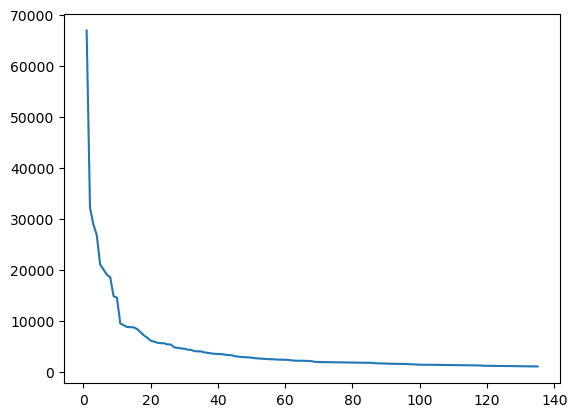

<Axes: >

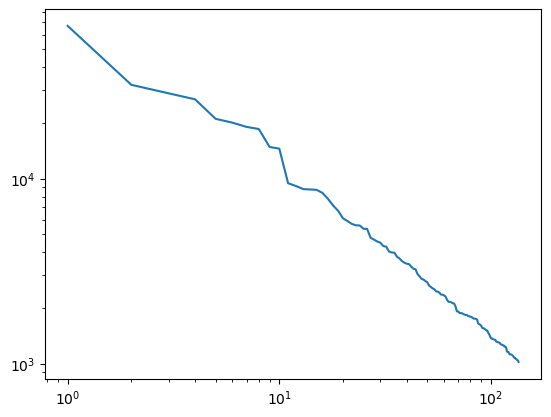

In [34]:
most_frequent_words = vocabulary[np.where(word_totals > 1000)]
most_frequent_word_counts = word_totals[np.where(word_totals > 1000)]

print("Total count: ", most_frequent_word_counts.sum())
print(sorted(zip(most_frequent_word_counts, most_frequent_words), reverse=True)[:8])

seaborn.lineplot(x=range(len(most_frequent_words), 0, -1),
                 y=np.sort(most_frequent_word_counts))
pyplot.show()
pyplot.xscale('log')
pyplot.yscale('log')
seaborn.lineplot(x=range(len(most_frequent_words), 0, -1),
                 y=np.sort(most_frequent_word_counts))

---

# Part C: Term Frequency - Inverse Document Frequency

If we use the actual word counts, the values will be dominated by a few super-frequent words, and most of the other words will be rare words that we might never see again (such as typos, numbers, and variants like *yaaaaaaaassss*). In the next problems, we will read the reviews file again, but this time we will do two common pre-processing steps:

1. Remove rare words that occur in fewer than five reviews
2. Weight the remaining words by *inverse document frequency (IDF)*

Term frequency is the number of times a word occurs in a document. **In our case, a document is a movie review**. The *document frequency* of a word type is the number of documents in the collection that contain at least one instance of the word. If the collection contains $D$ documents and $df_w$ is the document frequency of word $w$, the inverse document frequency for $w$ is usually defined as $-\log(\frac{df_w}{D}) = \log(\frac{D}{df_w})$.

Using our favorite log probabilities, a word that occurs in 10% of documents would have IDF 2.3, and a word that occurs in 1 out of 100,000 documents would have IDF 11.5. Instead of recording the term frequency of word $w$ in document $d$, our array will now record the term frequency for $w$ in $d$ *multiplied* by the IDF for $w$. This weighting emphasizes rare words relative to frequent words.




## Problem C1 (2 points)

Use the [`.get_feature_names_out()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.get_feature_names_out) function in `count_vectorizer` to get an array of the distinct word strings (word types) that the vectorizer identified in the reviews. This function allows us to identify the word strings that each value of `word_count` refers to. Save this as a variable called `vocabulary`. Print the first 20 elements.


In [35]:
# C1: your code here
vocabulary = count_vectorizer.get_feature_names_out()
print(vocabulary[:20])

['00' '000' '007' '0079' '0080' '0083' '00am' '00pm' '00s' '01' '0148'
 '01pm' '02' '03' '039' '05' '06' '07' '08' '09']


**C1 Expected Output**
```
['00' '000' '007' '0079' '0080' '0083' '00am' '00pm' '00s' '01' '0148'
 '01pm' '02' '03' '039' '05' '06' '07' '08' '09']
```

## Problem C2 (2 points)
The strings in `vocabulary` are sorted in alphanumeric order (numbers, then letters).
The *index* of a word is its position in this array. Use `np.where()` to find the index of the word "fantastic" within `vocabulary`. Name the output as `fantastic_index`, and print its value.

In [36]:
# C2: your code here
fantastic_index = np.where(vocabulary == 'fantastic')

## Given code
print(fantastic_index)

(array([12367]),)


**C2 Expected Output**
```
(array([12367], dtype=int64),)
```

*You may also see:*
```
(array([12367]),)
```

## Problem C3 (2 points)
Given that there are `4835` reviews and we are dropping words that occur in fewer than `5` documents, use numpy functions and arithmetic to calculate the maximum possible IDF value for a word in the resulting collection. Print that value, rounded to 3 decimal places.


In [37]:
# C3: your code here
idf = np.log(4835 / 5)
print(round(idf, 3))

6.874


**C3 Expected Output**
```
6.874
```

## Problem C4 (3 points)

Instead of using CountVectorizer like we did before, we’ll now use a different scikit-learn function called [`TfidfVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), which converts a collection of documents to a matrix of TF-IDF features.


Using `TfidfVectorizer`, we will set 5 to be the minimum “document frequency”, i.e. `min_df`. Name the vectorizer `tfidf_vectorizer`.

Then, use the `fit_transform()` function of `tfidf_vectorizer` to transform the `text` field of `reviews_df` into an array. Save this array as a new variable `reviews_tfidf`.

Print the `type` of `reviews_tfidf`. Notice that it's stored in a Compressed Sparse Row (CSR) matrix -- something we explored in problems B7 and B8!

In [38]:
# C4: your code here
tfidf_vectorizer = TfidfVectorizer(min_df = 5)
reviews_tfidf = tfidf_vectorizer.fit_transform(reviews_df['text'])
print(type(reviews_tfidf))

<class 'scipy.sparse._csr.csr_matrix'>


**C4 Expected Output**

```
<class 'scipy.sparse._csr.csr_matrix'>
```

## Problem C5 (3 points)

Apply `.get_feature_names_out()` to `tfidf_vectorizer`, and name the output as `tfidf_vocabulary`.

Use `np.where` to find the index of *fantastic* in `tfidf_vocabulary`. Name the index variable as `tfidf_fantastic_index`, and print its value.

In [39]:
# C5: your code here
tfidf_vocabulary = tfidf_vectorizer.get_feature_names_out()
tfidf_fantastic_index = np.where(tfidf_vocabulary == 'fantastic')

## Given code
print(tfidf_fantastic_index)

(array([3787]),)


**C5 Expected Output**
```
(array([3787], dtype=int64),)
```

*You may also see:*
```
(array([3787]),)
```

## Problem C6 (3 points)
(a) In the code cell below, compare the size differences between `tfidf_vocabulary` and our overall vocabulary (`vocabulary`) by dividing the size of `tfidf_vocabulary` with size of `vocabulary`. Print the number. Round to two decimals.

(b) In one sentence, explain why `fantastic` is not in the same index position as before (based on your answer in (a))?

In [40]:
## C6(a): your code here
print(round(tfidf_vocabulary.shape[0] / vocabulary.shape[0], 2))

0.29


**C6(a) Expected Output**
```
0.29
```

**Your answer to C6(b) here** `fantastic` is not in the same index position as before because the array for `tfidf_vocabulary` is 0.29 times smaller in size than the array for `vocabulary` so it doesn't have as much content as `vocabulary`. 

## Problem C7 (3 points)

We want to use our reviews as inputs to classify the binary output `label`, which is either 1 or 0.

Now that we have a curated representation of our reviews data set, we can try running a classifier on it.

Use the usual `train_test_split` scikit-learn function (i.e., the one we've used on previous homeworks) to create a train/test split with 10% test size from the `reviews_tfidf` array (input X's) and the `label` column of `reviews_df` (output Y). Set `random_state` as `2950` for ease of grading. Name the output variables `tfidf_train`, `tfidf_test`, `ratings_train`, and `ratings_test`.

Use string formatting to print the shape of `tfidf_train` and `tfidf_test`.

In [41]:
# C7: your code here
tfidf_train, tfidf_test, ratings_train, ratings_test = \
    train_test_split(reviews_tfidf, reviews_df['label'], \
                     test_size = 0.1, random_state = 2950)
print(f"Train TF-IDF shape: {tfidf_train.shape}")
print(f"Test TF-IDF shape: {tfidf_test.shape}")

Train TF-IDF shape: (4351, 11122)
Test TF-IDF shape: (484, 11122)


**C7 Expected Output**

```
Train TF-IDF shape: (4351, 11122)
Test TF-IDF shape: (484, 11122)
```


## Problem C8 (3 points)

The [`multinomial Naive Bayes classifier`](https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.MultinomialNB.html) is an extension of a simple Naive Bayes classifier, but it applies to cases with discrete features. It works well with frequencies, such as word counts, but it can also handle continuous representations like term frequencies. It is most often used for prediction with text data. We will use `MultinomialNB` from scikit-learn (imported at the top of this notebook) to predict the label for a review.

1. Create a classifier variable called `nb_classifier` using `MultinomialNB` with no input parameters.
2. `fit` the `nb_classifier` with `tfidf_train` and `ratings_train`. Note that, as with logistic regression, you can pass strings as labels -- sklearn will translate these into `0` and `1` for you -- our data is already labeled as `0` and `1`, but keep in mind for future training!
3. The default metric provided with the MultinomialNB  class is the mean accuracy, which you can call using [`.score()`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score). Use the `score()` function of `nb_classifier` to get average accuracy for the test vectors and the test ratings. Use string formatting to print this value rounded to two decimals.

In [42]:
# C8: your code here
nb_classifier = MultinomialNB()
nb_classifier = nb_classifier.fit(tfidf_train, ratings_train)
score = nb_classifier.score(tfidf_test, ratings_test)
print(f"accuracy: {round(score, 2)}")

accuracy: 0.87


**C8 Expected Output**

```
accuracy: 0.87
```

## Problem C9 (4 points)

The field `.feature_log_prob_` on the `nb_classifier` object is an array with one row per label (positive, negative) and one column per word type (input "feature" in machine learning). Each entry represents the log probability of the word in that type of document.

1. Create an array that represents the difference between these two rows (second row minus first row). Name this array `diff`.
2. Use `zip` to merge this array with the `tfidf_vocabulary` array into a list of tuples.
3. Sort this array in ascending order of `diff`. Name the resulting array as `sorted_words`.

*Hint:* You can use the [`sorted`](https://docs.python.org/3/library/functions.html#sorted) function to sort the tuples.

Print the first 5 elements in `sorted_words`.

In [43]:
# C9: your code here
diff = nb_classifier.feature_log_prob_[1] - \
                    nb_classifier.feature_log_prob_[0]
merged_list = list(zip(diff, tfidf_vocabulary))
sorted_words = sorted(merged_list)
print(sorted_words[0:5])

[(-2.272703214379934, 'waste'), (-2.030847277908455, 'worst'), (-1.9884312065895449, 'awful'), (-1.749727668826596, 'worse'), (-1.6775529902560748, 'terrible')]


**C9 Expected Output**

```
[(-2.272703214379934, 'waste'), (-2.030847277908455, 'worst'), (-1.9884312065895449, 'awful'), (-1.749727668826596, 'worse'), (-1.6775529902560748, 'terrible')]
```

*You may also see:*
```
[(np.float64(-2.272703214379934), 'waste'), (np.float64(-2.030847277908455), 'worst'), (np.float64(-1.9884312065895449), 'awful'), (np.float64(-1.749727668826596), 'worse'), (np.float64(-1.6775529902560748), 'terrible')]
```

## Problem C10 (3 points)

Use one for loop to print the difference in log probabilities (rounded to two decimal places) and the associated word for the first 10 entries in `sorted_words`.

Use a second for loop to print the difference in log probabilities (rounded to two decimal places) and the associated word for the last 10 entries in `sorted_words`.

You must use for loops and not just array indexing like in C9.

In [44]:
# C10: your code here
for f in sorted_words[:10]:
    print(f"{f[0]:.2f} {f[1]}")

for l in sorted_words[-10:]:
    print(f"{l[0]:.2f} {l[1]}")

-2.27 waste
-2.03 worst
-1.99 awful
-1.75 worse
-1.68 terrible
-1.66 stupid
-1.63 wasted
-1.58 pathetic
-1.57 laughable
-1.57 horrible
1.21 perfection
1.22 beautifully
1.28 matthau
1.29 outstanding
1.29 excellent
1.30 terrific
1.31 wonderful
1.35 superb
1.36 fantastic
1.68 touching


**C10 Expected Output**

```
-2.27	waste
-2.03	worst
-1.99	awful
-1.75	worse
-1.68	terrible
-1.66	stupid
-1.63	wasted
-1.58	pathetic
-1.57	laughable
-1.57	horrible
1.21	perfection
1.22	beautifully
1.28	matthau
1.29	outstanding
1.29	excellent
1.30	terrific
1.31	wonderful
1.35	superb
1.36	fantastic
1.68	touching
```

## Problem C11 (2 points)

In 1-2 sentences, describe what the log probabilities in C8 indicate; for example, what does a 1.36 value for `fantastic` imply? Comment on whether you think this is a good ranking of words for positive and negative reviews, and why.


**Your answer to C11 here:** The log probabilities indicate how likely each word in `tfidf_vocabulary` will appear in either a positive or negative movie review; therefore, a 1.36 value for `fantastic` implies that the word is more likely to appear in a positive movie review. Because it takes the difference between the likelihood of each word being in a negative review and a positive review, this method creates a generally good ranking; higher likelihood of being in a positive review will create a positive log probability, as shown in the list from C10. However, some words such as `matthau` are seemingly random and don't intuitively correlate to a positive or negative review; yet it is listed as more likely to be in a positive review. While it is generally a good ranking, there does seem to be some inaccuracies. 

## Problem C12 (4 points)

Here, you’ll get to write your own reviews and see if you can trick the classifier. The goal is to write four reviews:

* The first review should be positive to you and score `1` to the classifier.
* The second should be negative and score `0`.
* The third should be positive but incorrectly score `0`.
* The fourth should be negative and incorrectly score `1`. Use the words above as inspiration.

Then, write code that does the following to confirm your written reviews:

1. Create a list called `my_reviews` that contains four strings, each containing a review that you write.
2. You will transform this list into an array using `tfidf_vectorizer.transform()`.
3. Predict the rating of `my_reviews` using `nb_classifier` and `.predict()`. Your first review should give you a true positive, your second review should give you a true negative, your third review should give you a false negative, and your fourth review should give you a false positive.

In [45]:
# C12: your code here
my_reviews = ['The movie is excellent.', 'It was an awful experience.', \
              'You must be stupid to not like this movie because it was great.', \
              'This film was outstanding...at being bad.']
my_reviews_vectorizer = tfidf_vectorizer.transform(my_reviews)
nb_classifier.predict(my_reviews_vectorizer)

array([1, 0, 0, 1])

**C12 Expected Output**

```
array([1, 0, 0, 1])
```

# Part D: KMeans Clustering

The file `reviews_hw6.tsv` contains tab-delimited data for 2000 reviews from Yelp. Each review has either a "positive" or "negative" rating. We're going to be classifying the Yelp reviews in a different way: using KMeans clustering, which clusters a collection of documents based on their similarity rather than classification.

## Problem D1 (3 points)

Read in `reviews_hw6.tsv` and name the dataframe `cluster_df`. Note that, just like `movie_hw6.tsv`, this file's delimiter is `\t` as well. Use `TfidfVectorizer` with `min_df=5` to convert the text data into a matrix of TF-IDF features. Name this vectorizer `tfidf_vectorizer`. Use the `fit_transform()` method of `tfidf_vectorizer` to transform the `Text` column of `cluster_df` into a matrix. Store this matrix as `cluster_tfidf`. Create a [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering model, setting $K=100$ and `random_state=2950`. Name the model as `clustering`. Apply `.fit` to `clustering` with our input of `reviews_tfidf` (since we don't need labels, there's no need to do a train/test split).


In [46]:
# D1: your code here
cluster_df = pd.read_csv('reviews_hw6.tsv', delimiter = '\t')
tfidf_vectorizer = TfidfVectorizer(min_df = 5)
cluster_tfidf = tfidf_vectorizer.fit_transform(cluster_df['Text'])
clustering = KMeans(n_clusters = 100, \
                    random_state = 2950).fit(cluster_tfidf)

## Problem D2 (2 points)
The `.labels_` array in a K-means clustering object has one elment per review representing the index of the cluster the review is assigned to.

Use `.labels_` to find the cluster associated with the review at index 39. Name this variable `target_cluster`.

Print `target_cluster`.


In [47]:
# D2: your code here
target_cluster = clustering.labels_[39]
print(target_cluster)

62


**D2 Expected Output**
```
62
```

## Problem D3 (2 points)
Use `np.where` to get all the indices of all the reviews assigned to `target_cluster`.

Print the indices.

**Hint**: you can use `.labels_` again for this problem. There should be 22 reviews in `target_cluster`.

In [48]:
# D3: your code here
cluster_reviews = np.where(clustering.labels_ == target_cluster)
print(cluster_reviews)

(array([  17,   39,  135,  155,  308,  671,  811,  842,  862,  933, 1042,
       1056, 1105, 1254, 1431, 1443, 1452, 1671, 1708, 1872, 1948, 1958]),)


**D3 Expected Output**
```
(array([  17,   39,  135,  155,  308,  671,  811,  842,  862,  933, 1042,
       1056, 1105, 1254, 1431, 1443, 1452, 1671, 1708, 1872, 1948, 1958],
      dtype=int64),)
```

*You may also see:*
```
(array([  17,   39,  135,  155,  308,  671,  811,  842,  862,  933, 1042,
       1056, 1105, 1254, 1431, 1443, 1452, 1671, 1708, 1872, 1948, 1958]),)
```

## Problem D4 (3 points)
Use a for loop to make a list called `text_list` where each entry is `Text` (from `cluster_df`) for each of the reviews assigned to `target_cluster`.

In [49]:
# D4: your code here
text_list = []

for i in cluster_reviews:
    text = cluster_df['Text'].iloc[i]
    text_list.append(str(text))

Use the given code to make a word cloud from `text_list`.

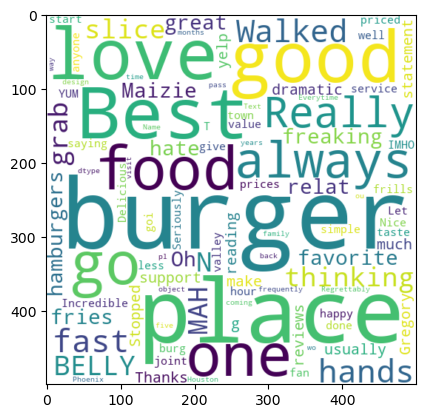

In [50]:
# Given code
wordcloud = WordCloud(background_color="white",
                     width=500,
                     height=500
                     ).generate(' '.join(text_list))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## Problem D5 (5 points)

a) In one sentence, describe what cluster 62 (the `target_cluster`) is about.

b) Check the text for two additional (different) clusters. For each cluster, write the cluster index number, and describe its themes.

**D5(a): your answer here**

* **What is cluster 62 about**: Cluster 62 seems to be about reviews for different burger places.

81


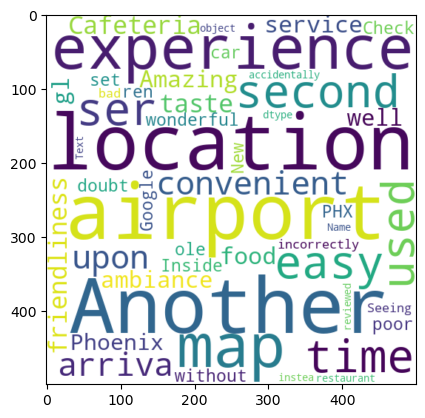

In [51]:
## D5(b)(i) explore one other cluster here:
target_cluster2 = clustering.labels_[50]
print(target_cluster2)

cluster_reviews2 = np.where(clustering.labels_ == target_cluster2)
text_list2 = []

for i in cluster_reviews2:
    text = cluster_df['Text'].iloc[i]
    text_list2.append(str(text))

wordcloud = WordCloud(background_color="white",
                     width=500,
                     height=500
                     ).generate(' '.join(text_list2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**D5(b)(ii) describe the cluster index and theme here:** The cluster index number for this cluster is 81. The themes for this cluster include airports and different restaurants in Phoenix, and many reviews discuss people's experiences at these restaurants in regards to food, convenience, ambience, service, and more. 

38


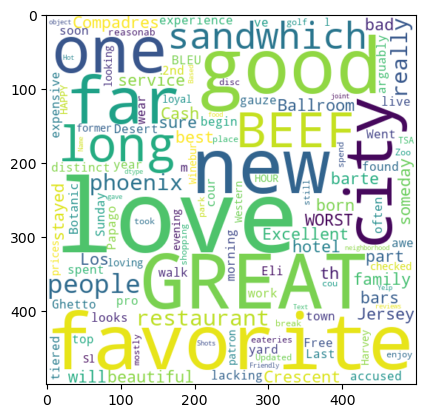

In [52]:
## D5(c)(i) explore another cluster here:
target_cluster3 = clustering.labels_[47]
print(target_cluster3)

cluster_reviews3 = np.where(clustering.labels_ == target_cluster3)
text_list3 = []

for i in cluster_reviews3:
    text = cluster_df['Text'].iloc[i]
    text_list3.append(str(text))

wordcloud = WordCloud(background_color="white",
                     width=500,
                     height=500
                     ).generate(' '.join(text_list3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**D5(c)(ii) describe the cluster index and theme here:** The cluster index number for this cluster is 38. The themes for this cluster include different locations (hotels, bars, restaurants, etc.) in a city with descriptions about the city, its people, hotels, food, and more; the reviews also discuss what people think about these locations with adjectives such as favorite, love, worst, good, and more.

# Part E: Singular Value Decomposition with Recipes

Below, we'll use a dataset of ingredients in different recipes, which we'll call `recipes_df`. In this dataframe, each column is an ingredient and each row is a recipe. We have binary values for each ingredient. This tells us whether that ingredient is (1) or is not (0) used in the given recipe.

This data is a subset of [a recipe ingredients dataset](https://www.kaggle.com/datasets/kaggle/recipe-ingredients-dataset) released on Kaggle by the meal planning site [Yummly](https://www.yummly.com/).

## Problem E1 (3 points)
Our goal is to perform SVD on this ingredient/recipe matrix. There's some additional metadata that we don't need for now.
1. Use `pd.read_csv()` to read in `recipes_hw6.csv`. Name the dataframe `recipes_df`.
2. Create a new dataframe called `ingredients_df` by dropping the `RecipeID` and `Cuisine` columns from `recipes_df`.
3. Calculate the rank of `ingredients` using [`np.linalg.matrix_rank`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.matrix_rank.html).  The matrix rank, in this context, indicates the number of linearly independent columns in the dataframe.

Print the shape of `ingredients`.
Print the rank of `ingredients`.


In [53]:
# E1: your code here
recipes_df = pd.read_csv('recipes_hw6.csv')
ingredients_df = recipes_df.drop(columns = ['RecipeID', 'Cuisine'])
ingredients = np.linalg.matrix_rank(ingredients_df)

print(f"Shape of ingredients: {ingredients_df.shape}")
print(f"Matrix rank of ingredients: {ingredients}")

Shape of ingredients: (1000, 200)
Matrix rank of ingredients: 200


**E1 Expected Output**

```
Shape of ingredients: (1000, 200)
Matrix rank of ingredients: 200
```

## Problem E2 (2 points)

Using [`np.linalg.svd`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html), generate the singular value decomposition of `ingredients_df`. Name the three outputs `U`, `s`, and `Vt`, respectively.

Print the shape of `U`, `s`, `Vt`.

In [54]:
# E2: your code here
U, s, Vt = np.linalg.svd(ingredients_df, compute_uv = True, \
                         full_matrices = False)

print(f"The shape of U: {U.shape}")
print(f"The shape of s: {s.shape}")
print(f"The shape of Vt: {Vt.shape}")

The shape of U: (1000, 200)
The shape of s: (200,)
The shape of Vt: (200, 200)


**E2 Expected Output**

```
The shape of U: (1000, 1000)
The shape of s: (200,)
The shape of Vt: (200, 200)
```

## Problem E3 (2 points)

Describe what matrices `U`, `s`, and `Vt` represent in words, for our recipe data setting.


**E3: Your answer here** For our recipe data setting, the matrix `U` represents the relationship between each recipe (rows) and the ingredients (concepts) of the recipe (columns). It shows the strength between a recipe and each concept/ingredient. The matrix `s` represents the ingredients in the data. It shows the strength/prevalence of each concept/ingredient in the total recipe data. The matrix `Vt` represents the relationship between the ingredients (rows) and the recipes (columns), and it shows the strength between a ingredient and each recipe. In the context of interpretation, it is like the inverse of the matrix `U`. 

## Problem E4 (2 points)

From Problem E1, you found the rank of `ingredients_df` is `200`. In two sentences, answer: What does rank represent in the SVD? What do the values in `s` represent?

**E4: Your answer here** In the SVD, rank represents the number of ingredients that are listed in the ingredients_df that have impact on the recipe data, and it shows which of the ingredients/concepts have non-zero strengths. The values in `s` represent the strength of each ingredient/concept in the recipe data.

## Problem E5 (4 points)
For the next sets of problems, we will work on reconstructing the `ingredients` matrix with less information. To do this, we will truncate the `U`, `S`, and `Vt` matrix to a lower rank. As an example, if we only wanted to compute the rank 10 approximation, we could truncate U, S, and Vt from the original rank number to rank 10 to create new matrices `U’`, `S’`, and `V’t`. We could then multiply `U’`, `S’`, and `V’t` to get the new approximation `A’`.

We are going to reconstruct `ingredients` using rank 20 approximation.
Use indexing to achieve the following:

1. Create `U_trunc` by selecting first 20 columns (i.e. columns 0, 1, … 19) of `U`
2. Create `s_trunc` by selecting first 20 elements (i.e. elements 0, 1, … 19) of `s`
3. Create `Vt_trunc` by selecting first 20 rows (i.e. rows 0, 1, … 19) of `Vt`

Print the shape of`U_trunc`, `S_trunc`, and `Vt_trunc`.

In [55]:
# E5: your code here
U_trunc = U[:, :20]
print(f"U_trunc shape: {U_trunc.shape}")

s_trunc = s[:20]
print(f"s_trunc shape: {s_trunc.shape}")

Vt_trunc = Vt[:20, :]
print(f"Vt_trunc shape: {Vt_trunc.shape}")

U_trunc shape: (1000, 20)
s_trunc shape: (20,)
Vt_trunc shape: (20, 200)


**E5 Expected Output**
```
U_trunc shape: (1000, 20)
s_trunc shape: (20,)
Vt_trunc shape: (20, 200)
```

## Problem E6 (3 points)
To reconstruct `ingredients_df`, we need to multiply the three truncated matrices together. However, the numpy array `s` is not in matrix form yet. The matrix form of `s` is what we refer to as $\Sigma$, the singular value matrix. $\Sigma$ is a diagonal matrix, which contains zeroes everywhere except the diagonal.

Use [`np.diag`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) to create the diagonal matrix `Sigma_trunc`. The values along the diagonal of `Sigma_trunc` should be the values in `s_trunc`, with larger values in the upper left of the diagonal (and smaller values towards the bottom right).

Print the top-left 5x5 section of `Sigma_trunc`.

In [56]:
# E6: your code here
Sigma_trunc = np.diag(s_trunc)
print(Sigma_trunc[:5, :5])

[[29.52774967  0.          0.          0.          0.        ]
 [ 0.         16.503721    0.          0.          0.        ]
 [ 0.          0.         14.82993976  0.          0.        ]
 [ 0.          0.          0.         14.51132379  0.        ]
 [ 0.          0.          0.          0.         13.17119057]]


**E6 Expected Output**
```
[[29.52774967  0.          0.          0.          0.        ]
 [ 0.         16.503721    0.          0.          0.        ]
 [ 0.          0.         14.82993976  0.          0.        ]
 [ 0.          0.          0.         14.51132379  0.        ]
 [ 0.          0.          0.          0.         13.17119057]]
```

## Problem E7 (3 points)
Now we are going to create a 20-rank approximation of `ingredients_df`.

Use matrix multiplication (with the `@` operator) to multiply `U_trunc`, `Sigma_trunc`, and `Vt_trunc` with matrix multiplication. Note that the order of matrix multiplication matters! Name the resulting dataframe `ingredients_reconstructed`.

Print the shape of `ingredients_reconstructed`.

In [57]:
# E7: your code here
ingredients_reconstructed = U_trunc @ Sigma_trunc @ Vt_trunc
print(ingredients_reconstructed.shape)

(1000, 200)


**E7 Expected Output**

```
(1000, 200)
```


## Problem E8 (3 points)
In the problem after this one, we will compare a recipe between the original dataframe and the approximation dataframe. In order to do that, in this problem, we will:
1. Use `np.round()` to round all the values of `ingredients_reconstructed` to `0.0` or `1.0`. (Note: you might end up with `-0` after rounding. We need these values to simply be 0, so you should use `np.abs()` to deal with `-0`.)
2. Turn `ingredients_reconstructed` into a pandas dataframe, and name it `ingredients_reconstructed_df`. Then, set the column names of `ingredients_reconstructed_df` to be the same as the columns of `ingredients_df`.

Print the first 5 rows of `ingredients_reconstructed_df` .


In [58]:
# E8: your code here
ingredients_reconstructed = np.abs(ingredients_reconstructed.round(0))
ingredients_reconstructed_df = pd.DataFrame(ingredients_reconstructed)
ingredients_reconstructed_df.columns = ingredients_df.columns
print(ingredients_reconstructed_df.head())

   all-purpose_flour  avocado  bacon  baking_powder  baking_soda  \
0                0.0      0.0    0.0            0.0          0.0   
1                0.0      0.0    0.0            0.0          0.0   
2                0.0      0.0    0.0            0.0          0.0   
3                0.0      0.0    0.0            0.0          0.0   
4                0.0      0.0    0.0            0.0          0.0   

   balsamic_vinegar  bay_leaf  bay_leaves  beansprouts  bell_pepper  ...  \
0               0.0       0.0         0.0          0.0          0.0  ...   
1               0.0       0.0         0.0          0.0          0.0  ...   
2               0.0       0.0         0.0          0.0          0.0  ...   
3               0.0       0.0         0.0          0.0          0.0  ...   
4               0.0       0.0         0.0          0.0          0.0  ...   

   water  whipping_cream  white_onion  white_pepper  white_sugar  \
0    0.0             0.0          0.0           0.0          0.0  

**E8 Expected Output**
```
  all-purpose_flour  avocado  bacon  baking_powder  baking_soda  \
0                0.0      0.0    0.0            0.0          0.0   
1                0.0      0.0    0.0            0.0          0.0   
2                0.0      0.0    0.0            0.0          0.0   
3                0.0      0.0    0.0            0.0          0.0   
4                0.0      0.0    0.0            0.0          0.0   

   balsamic_vinegar  bay_leaf  bay_leaves  beansprouts  bell_pepper  ...  \
0               0.0       0.0         0.0          0.0          0.0  ...   
1               0.0       0.0         0.0          0.0          0.0  ...   
2               0.0       0.0         0.0          0.0          0.0  ...   
3               0.0       0.0         0.0          0.0          0.0  ...   
4               0.0       0.0         0.0          0.0          0.0  ...   

   water  whipping_cream  white_onion  white_pepper  white_sugar  \
0    0.0             0.0          0.0           0.0          0.0   
1    0.0             0.0          0.0           0.0          0.0   
2    0.0             0.0          0.0           0.0          0.0   
3    0.0             0.0          0.0           0.0          0.0   
4    0.0             0.0          0.0           0.0          0.0   

   white_vinegar  whole_milk  worcestershire_sauce  yellow_onion  zucchini  
0            0.0         0.0                   0.0           0.0       0.0  
1            0.0         0.0                   0.0           0.0       0.0  
2            0.0         0.0                   0.0           0.0       0.0  
3            0.0         0.0                   0.0           0.0       0.0  
4            0.0         0.0                   0.0           0.0       0.0  

[5 rows x 200 columns]
```


## Problem E9 (4 points)
(a) In the code cell below, print the ingredients of the recipe at index 137 in the original dataframe (`ingredients_df`), and then ingredients for that recipe in the reconstructed dataframe (`ingredients_reconstructed_df`). Only print the ingredients where the value is `1`. You may find this [stackoverflow post about filtering a series](https://stackoverflow.com/questions/28272137/pandas-how-to-filter-a-series) useful.

(b) In the markdown cell below, describe what you think recipe 137 is.
In 1-2 sentences, compare the differences between the original and reconstructed recipe. (Remember, our reconstructed dataframe is nice because we use far less data storage to generate the recipes -- but at what cost?)

In [59]:
# E9: your code here
original = ingredients_df.iloc[137]
print(original[original == 1])

reconstructed = ingredients_reconstructed_df.iloc[137]
print(reconstructed[reconstructed == 1])

cayenne           1
chili_powder      1
cinnamon          1
coriander         1
cumin             1
diced_tomatoes    1
fresh_cilantro    1
fresh_ginger      1
garam_masala      1
garlic_cloves     1
lemon_juice       1
onions            1
pepper            1
salt              1
tomato_paste      1
Name: 137, dtype: int64
chili_powder     1.0
garlic_cloves    1.0
onions           1.0
pepper           1.0
salt             1.0
Name: 137, dtype: float64


- **What is Recipe 137**: I think recipe 137 is an Indian dish (maybe a type of curry or tomato-based stew). 

- **Describe ingredient differences between original and reconstructed df for Recipe 137**: The original recipe, though it uses more data storage, provides more information on what ingredients you need and is much more descriptive and helpful. The reconstructed recipe uses less data storage but it isn't very descriptive. It leaves you to guess what type of food you are making, especially since the ingredients that are listed are common and basic. 

# Section F: Naïve Bayes and Gimme! Orders

## Problem F1

| Email |  Bolded words | Category|
| --- | --- | --- |
| 1 | **"espresso caramel"** | complex |
| 2 | **"caramel mocha spice"** | complex |
| 3 | **"americano espresso"**  | simple |

You are trying to build a classifier that uses the bolded words in an order to predict whether a Gimme order is simple or complex. The above table includes the bolded words in each of three orders, as well as whether the order was simple or complex.

## Problem F1(a) (2 points)
The given code below gives you two dataframes: `order_df` (our original dataframe) and `order_vocab`. Each row of `order_vocab` is a `single word` from `Order`. Using `order_vocab`, compute the following and print according to the format given. Use [`.nunique`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html) to look for distinct word count.

*   Total distinct word count across all orders.
*   Total word count in complex orders.
*   Total word count in simple orders.

In [60]:
# Given code

order_data = {
    'Order': [1, 2, 3],
    'Bolded words': ["espresso caramel", "caramel mocha spice", "americano espresso"],
    'Category': ["complex", "complex", "simple"]
}

order_df = pd.DataFrame(order_data)
order_df

,Order,Bolded words,Category
0,1,espresso caramel,complex
1,2,caramel mocha spice,complex
2,3,americano espresso,simple


In [61]:
# Given code

order_vocab = order_df.copy()
order_vocab["single word"] = order_vocab["Bolded words"].apply(lambda x: x.split())
order_vocab = order_vocab.explode("single word")
order_vocab = order_vocab[["Order", "single word", "Category"]]
order_vocab

,Order,single word,Category
0,1,espresso,complex
0,1,caramel,complex
1,2,caramel,complex
1,2,mocha,complex
1,2,spice,complex
2,3,americano,simple
2,3,espresso,simple


In [62]:
# F1(a): your code here
distinct_wc = order_vocab['single word'].nunique()
print(f"Distinct word count overall: {distinct_wc}")

complex = order_vocab[order_vocab['Category'] == 'complex']
complex_wc = len(complex['single word'])
print(f"Word count in complex orders: {complex_wc}")

simple = order_vocab[order_vocab['Category'] == 'simple']
simple_wc = len(simple['single word'])
print(f"Word count in simple orders: {simple_wc}")

Distinct word count overall: 5
Word count in complex orders: 5
Word count in simple orders: 2


**F1(a) Expected Output**
```
Distinct word count overall: 5
Word count in complex orders: 5
Word count in simple orders: 2
```

## Problem F1(b) (2 points)

Using these counts, fill in the # complex, # simple columns of the word frequency table provided. Calculate the probabilities $P(Word | Complex)$ and $P(Word | Simple)$ columns of the table accordingly. You should leave the probabilities in fractional form.


**your F1(b) answer here**

| Word |  # complex | # simple | $P(Word \| Complex)$  | $P(Word \| Simple)$ |
| --- | --- | --- | --- | --- |
| "espresso" | 1 | 1 | 1/5 | 1/2 |
| "caramel" | 2 | 0 | 2/5 | 0/2 |
| "mocha" | 1 | 0 | 1/5 | 0/2 |
| "spice" | 1 | 0 | 1/5 | 0/2 |
| "americano" | 0 | 1 | 0/5 | 1/2 |


## Problem F1(c) (2 points)
Apply Laplace smoothing to calculate $P(Word | Complex)$ and $P(Word | Simple)$ with the correction. Remember that with Laplace smoothing, we increase the count of each distinct word by 1 (thus affecting the numerator), and increase the total count by the number of distinct words (affecting the denominator). You should leave the probabilities in fractional form.

**your F1(c) answer here**

| Word |  $P(Word \| Complex)$ (Laplace)  | $P(Word \| Simple)$ (Laplace) |
| --- | --- | --- |
| "espresso" | 2/10 | 2/7 |
| "caramel" | 3/10 | 1/7 |
| "mocha" | 2/10 | 1/7 |
| "spice" | 2/10 | 1/7 |
| "americano" | 1/10 | 2/7 |

## Problem F2
In the next set of problems, we will use Naive Bayes with Laplace correction to calculate the un-normalized probability that an order of "espresso americano caramel" is complex or simple.
Note that for the following problems, all probability should be un-normalized.

## Problem F2(a) (2 points)
In markdown, write out the formula for calculating the (un-normalized) probability that the coffee order with bolded words “espresso americano caramel” is complex. First, fill in what we’re trying to solve (i.e. P(___ | ____)), and then write out the corresponding formula incorporating Bayes / chain rules. If you'd like to use math formatting in markdown, you can enclose formulas within leading and ending dollar sign symbols  (e.g.: $x+y$) .

**Markdown for F2(a) here:**
- P(complex|"espresso americano caramel") $\propto$ P("espresso americano caramel"|complex)$*$P(complex)
- P(complex|"espresso americano caramel") $\propto$ P("espresso"|complex)P("americano"|complex)P("caramel"|complex)$*$P(complex)

## Problem F2(b) (2 points)
Write the code to calculate the numerator of the probability formula you wrote out in F2a (i.e., the un-normalized probability) that the order is *complex* given the words "espresso americano caramel". Then print both the calculated probability and its logarithm. Round both outputs to the fifth decimal point.

In [63]:
# F2(b): Calculate probability of complex order
prob_espresso_complex = 2 / 10
prob_americano_complex = 1 / 10
prob_caramel_complex = 3 / 10
prob_complex = 2 / 3

f2a_complex_prob = prob_espresso_complex * prob_americano_complex \
                    * prob_caramel_complex * prob_complex
log_complex_prob = np.log(f2a_complex_prob)

print(round(f2a_complex_prob, 5))
print(round(log_complex_prob, 5))

0.004
-5.52146


**F2(b) Expected Output**
```
0.004
-5.52146
```

## Problem F2(c) (2 points)
Write the code to calculate the numerator of the probability (i.e., the un-normalized probability) that the order is *simple* given the words "espresso americano caramel". Then print both the calculated probability and its logarithm. Round both outputs to the fifth decimal point.


In [64]:
# F2(c): Calculate probability of simple order
prob_espresso_simple = 2 / 7
prob_americano_simple = 2 / 7
prob_caramel_simple = 1 / 7
prob_simple = 1 / 3

f2a_simple_prob = prob_espresso_simple * prob_americano_simple \
                    * prob_caramel_simple * prob_simple
log_simple_prob = np.log(f2a_simple_prob)

print(round(f2a_simple_prob, 5))
print(round(log_simple_prob, 5))

0.00389
-5.55005


**F2(c) Expected Output**
```
0.00389
-5.55005
```

## Problem F2(d) (2 points)

i) In the code block, calculate the exponential of the differences in log probabilies you get from F2(b) and F2(c). Round the output to the fifth decimal point.

ii) In the markdown cell below, use 1 sentence to explain your decision about whether the order is more likely to be complex or simple, and how much more likely this is the case. Use the difference you outputted in the previous question when writing your answer.


In [65]:
# your F2(d)(i) code here
exp_diff = 2.718281828459045 ** (log_complex_prob - log_simple_prob)
print(round(exp_diff, 5))

1.029


**F2(d)(ii) your answer here:** Because the exponentiated difference is 1.029, the order is 1.029 times more likely to be complex.